In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('heart3.csv')
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271,  0.91452919])

In [44]:
x = data.drop(['target'], axis=1)
y = data['target']


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predicted_value = logreg.predict(X_test)

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
new_data = [[63, 	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1]]
newValurpredict = logreg.predict(new_data)
print(newValurpredict)

new_data = [[57,	0,	0,	140,	241,	0,	1,	123,	1,	0.2,	1,	0,	3]]
newValurpredict = logreg.predict(new_data)
print(newValurpredict)

[1]
[0]


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [48]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, predicted_value, labels=[0, 1])
print("Confusion Matrix we want is: \n", conf)

TP = conf[0][0]
TN = conf[1][1]
FP = conf[1][0]
FN = conf[0][1]

print("True Positives", TP)
print("True Negatives", TN)
print("False Positives", FP)
print("False Negatives", FN)


Confusion Matrix we want is: 
 [[20  5]
 [ 6 30]]
True Positives 20
True Negatives 30
False Positives 6
False Negatives 5


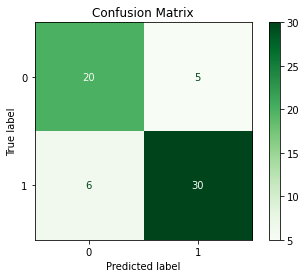

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.show()


In [50]:
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef
print(f"Recall Score: {recall_score(y_test, predicted_value):.3}")
print(f"Specitivity Score: {TN/(TN+FP):.3}")
print(f"Precision Score: {precision_score(y_test, predicted_value):.3}")
print(f"Negative Prediction Value: {TN/(TN+FN):.3}")
print(f"F1 Score: {f1_score(y_test, predicted_value):.3}")
print(
    f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, predicted_value):.3}")


Recall Score: 0.833
Specitivity Score: 0.833
Precision Score: 0.857
Negative Prediction Value: 0.857
F1 Score: 0.845
Matthews Correlation Coefficient: 0.63


Area under the curve:  0.8166666666666668


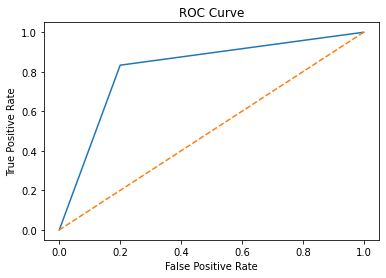

In [51]:
from sklearn.metrics import auc, roc_curve, RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, predicted_value)
area = auc(fpr, tpr)
print("Area under the curve: ", area)
plt.plot(fpr, tpr)
plt.plot([1, 0], [1, 0], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
